In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from baseline import print_rules
from util import CombinationClassifier
from tasks.adult import make_task_modified_hours_per_week as make_task

In [2]:
clf_a, clf_b, X, X_display, y, feature_names = make_task()

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:02:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:02:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(False,True)$

In [5]:
focus_class = '(False, True)'

In [6]:
class_names = np.array(['other', focus_class])

In [7]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    clf = CombinationClassifier(comparer, focus_class)
    y_pred = clf.predict(X)
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y_pred)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_title('Relative feature importance')
    ax.scatter(feature_importances[np.flip(feature_order)],
               comparer.feature_names[np.flip(feature_order)])
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    y_test = mclass_diff == np.where(comparer.class_names == focus_class)[0][0]
    print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=y_test, precision=2)

    print(classification_report(y_test, tree.predict(X), target_names=class_names))

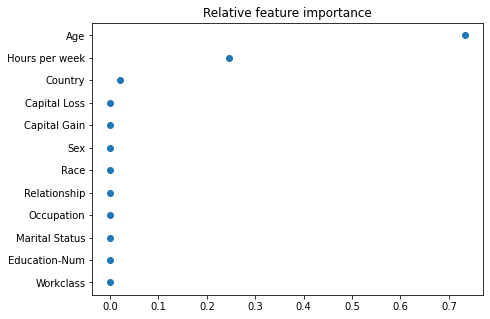

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6510
(False, True)       0.00      0.00      0.00         3

     accuracy                           1.00      6513
    macro avg       0.50      0.50      0.50      6513
 weighted avg       1.00      1.00      1.00      6513



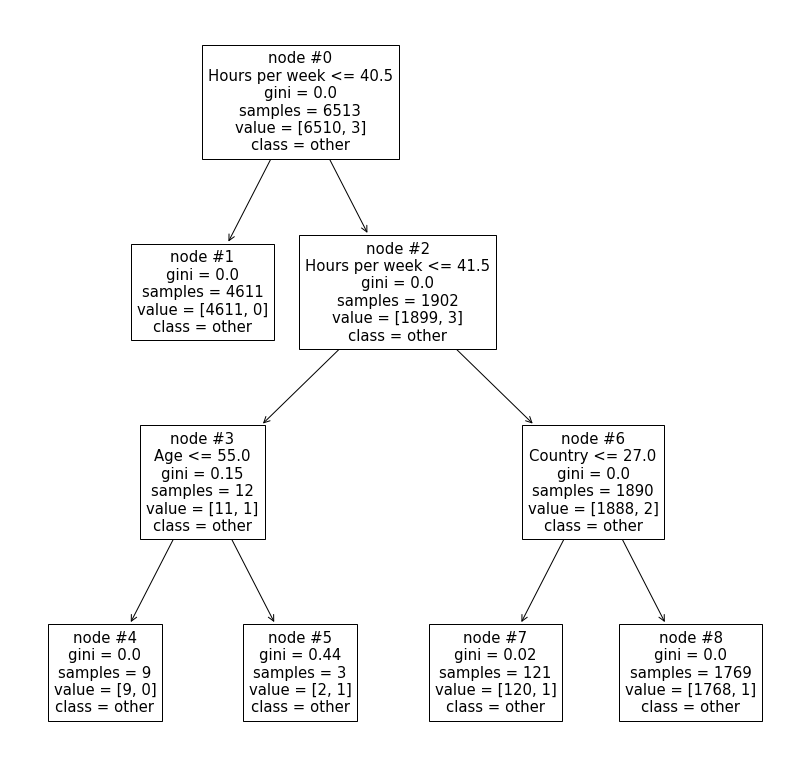

In [8]:
explain(max_depth=3)

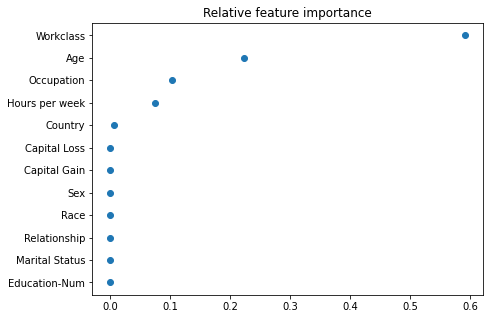

node #6: if (Age > 55.0) and (Workclass <= 3.0) and (Hours per week > 40.5) and (Hours per week <= 41.5) then class (False, True) (covers 1.0 of 1 instances)
               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6510
(False, True)       1.00      0.33      0.50         3

     accuracy                           1.00      6513
    macro avg       1.00      0.67      0.75      6513
 weighted avg       1.00      1.00      1.00      6513



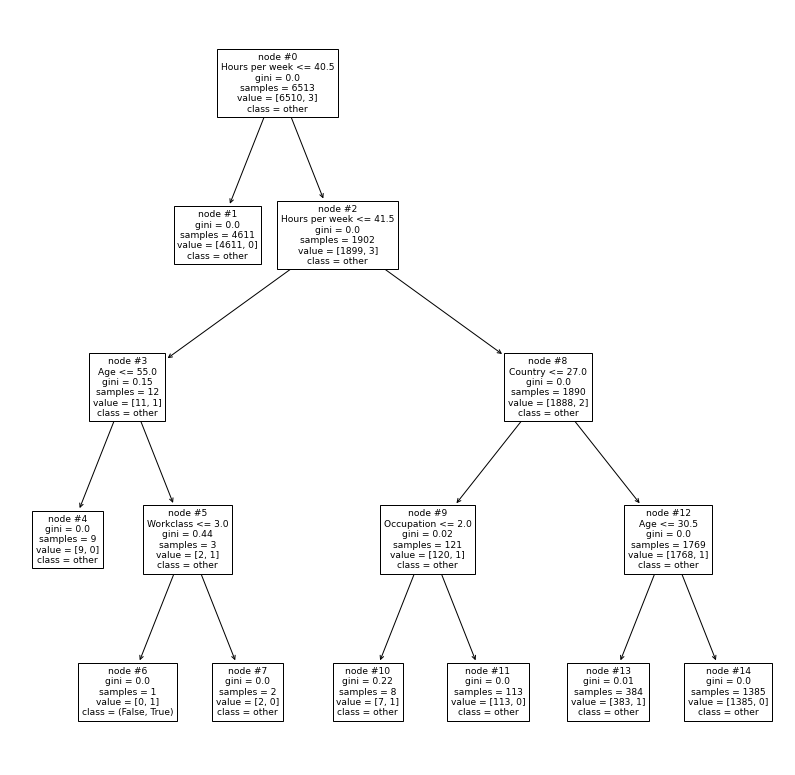

In [9]:
explain(max_depth=4)

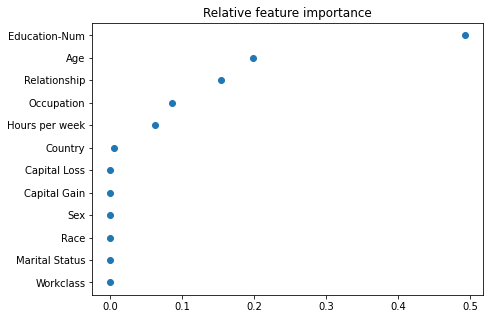

node #7: if (Age > 55.0) and (Education-Num > 9.5) and (Hours per week > 40.5) and (Hours per week <= 41.5) then class (False, True) (covers 1.0 of 1 instances)
               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6510
(False, True)       1.00      0.33      0.50         3

     accuracy                           1.00      6513
    macro avg       1.00      0.67      0.75      6513
 weighted avg       1.00      1.00      1.00      6513



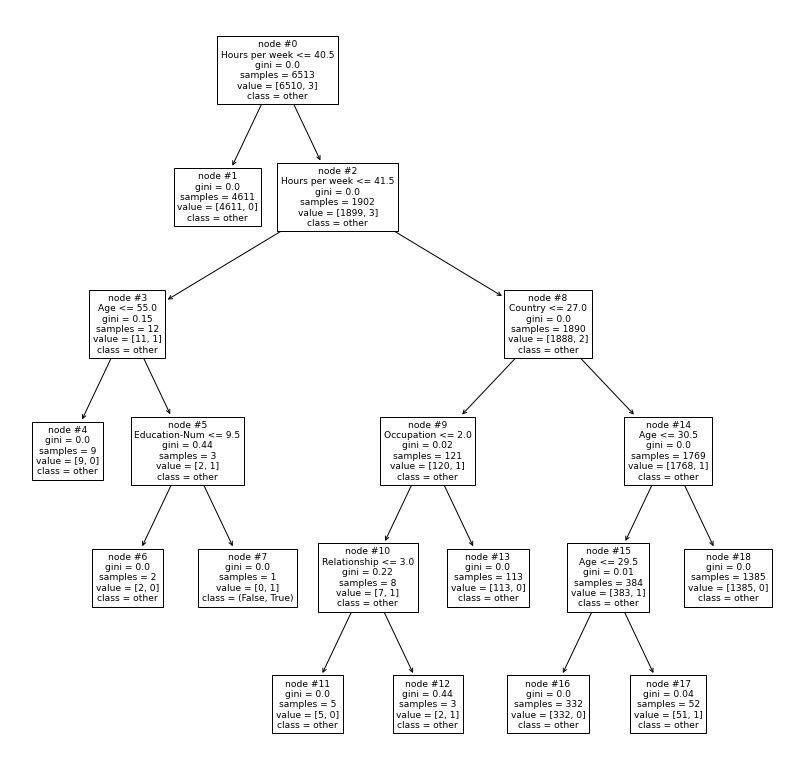

In [10]:
explain(max_depth=5)

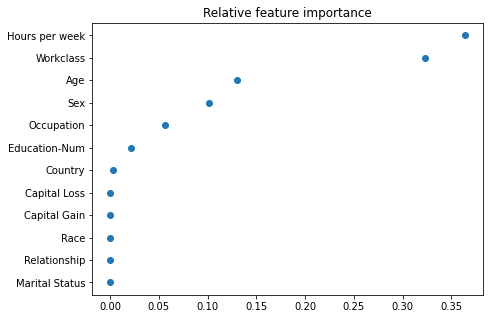

node #13: if (Occupation <= 2.0) and (Sex > 0.5) and (Hours per week > 41.5) and (Hours per week <= 46.5) and (Country <= 27.0) then class (False, True) (covers 1.0 of 1 instances)
node #6: if (Age > 55.0) and (Workclass <= 3.0) and (Hours per week > 40.5) and (Hours per week <= 41.5) then class (False, True) (covers 1.0 of 1 instances)
               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6510
(False, True)       1.00      0.67      0.80         3

     accuracy                           1.00      6513
    macro avg       1.00      0.83      0.90      6513
 weighted avg       1.00      1.00      1.00      6513



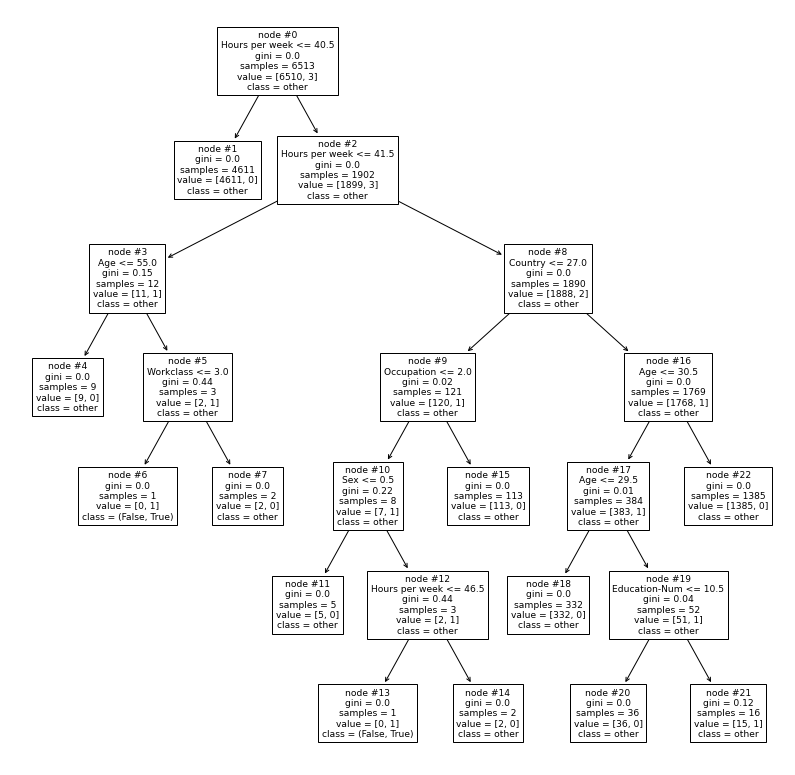

In [11]:
explain(max_depth=6)

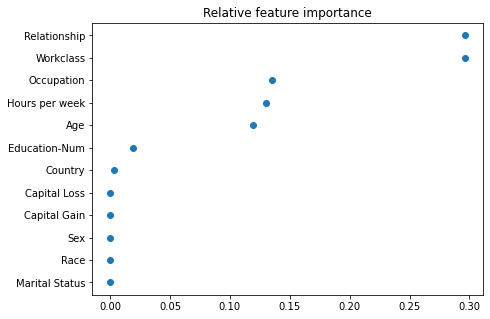

node #13: if (Occupation <= 2.0) and (Relationship > 2.5) and (Hours per week > 41.5) and (Hours per week <= 46.0) and (Country <= 27.0) then class (False, True) (covers 1.0 of 1 instances)
node #6: if (Age > 55.0) and (Workclass <= 3.0) and (Hours per week > 40.5) and (Hours per week <= 41.5) then class (False, True) (covers 1.0 of 1 instances)
               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6510
(False, True)       1.00      0.67      0.80         3

     accuracy                           1.00      6513
    macro avg       1.00      0.83      0.90      6513
 weighted avg       1.00      1.00      1.00      6513



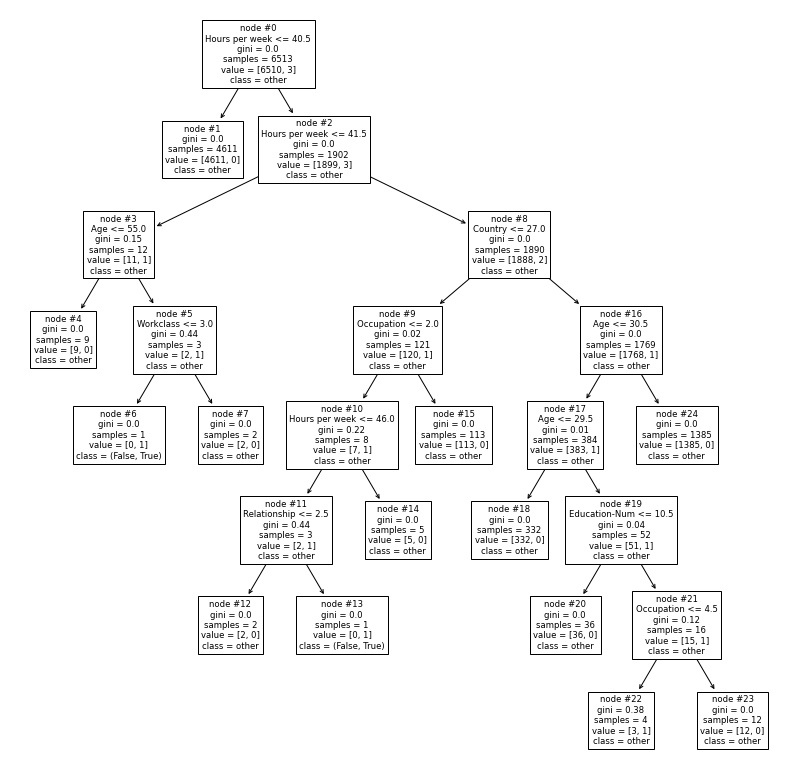

In [12]:
explain(max_depth=7)

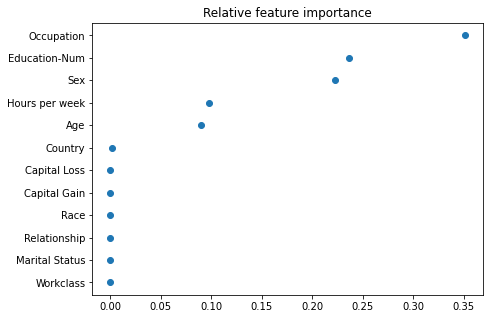

node #24: if (Age > 29.5) and (Age <= 30.5) and (Education-Num > 10.5) and (Occupation > 3.5) and (Occupation <= 4.5) and (Hours per week > 41.5) and (Country > 27.0) then class (False, True) (covers 1.0 of 1 instances)
node #13: if (Occupation <= 2.0) and (Sex > 0.5) and (Hours per week > 41.5) and (Hours per week <= 46.0) and (Country <= 27.0) then class (False, True) (covers 1.0 of 1 instances)
node #7: if (Age > 55.0) and (Education-Num > 9.5) and (Hours per week > 40.5) and (Hours per week <= 41.5) then class (False, True) (covers 1.0 of 1 instances)
               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6510
(False, True)       1.00      1.00      1.00         3

     accuracy                           1.00      6513
    macro avg       1.00      1.00      1.00      6513
 weighted avg       1.00      1.00      1.00      6513



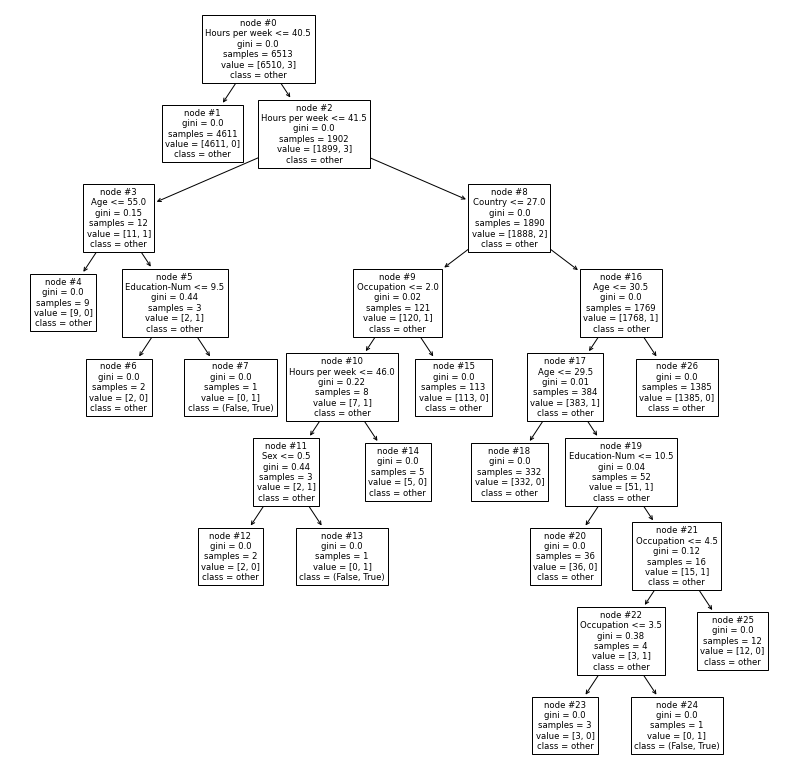

In [13]:
explain(max_depth=8)

Now it achieves perfect accuracy. Three rules are needed to describe 3 instances.

## $(True, False)$

In [14]:
focus_class = '(True, False)'

In [15]:
class_names = np.array(['other', focus_class])

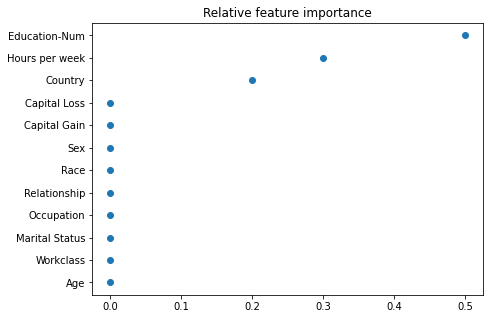

node #6: if (Education-Num > 12.5) and (Hours per week > 58.5) and (Country > 40.5) then class (True, False) (covers 1.0 of 1 instances)
               precision    recall  f1-score   support

        other       1.00      1.00      1.00      6512
(True, False)       1.00      1.00      1.00         1

     accuracy                           1.00      6513
    macro avg       1.00      1.00      1.00      6513
 weighted avg       1.00      1.00      1.00      6513



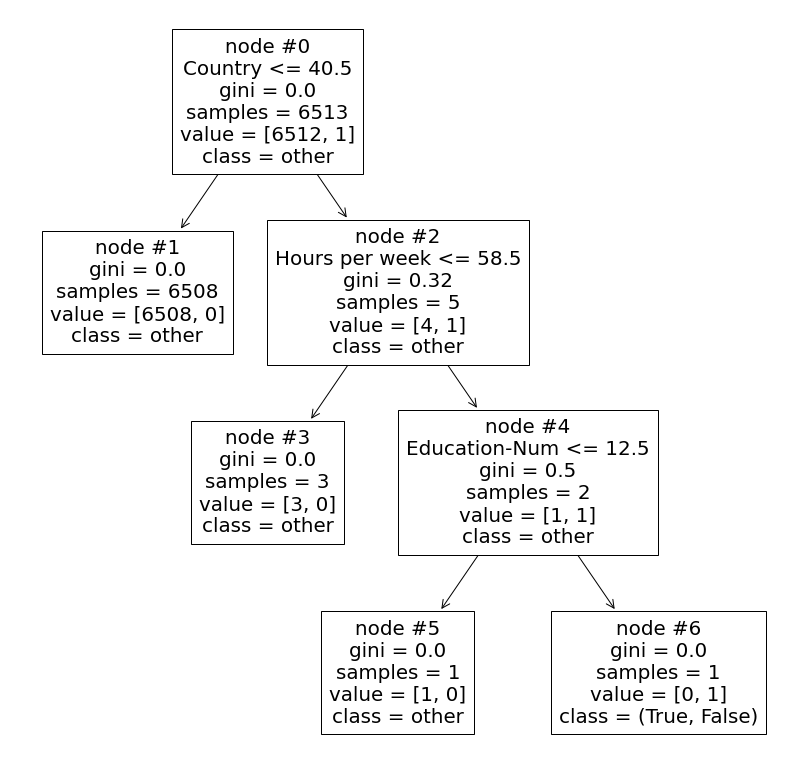

In [16]:
explain(max_depth=3)